In [1]:
import pandas as pd

In [2]:
# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries = countries.set_index('country') # 인덱스 지정
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [3]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Belgium to United Kingdom
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  5 non-null      float64
 1   area        5 non-null      int64  
 2   capital     5 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


---

<div class="alert alert-success">
    <b>EXERCISE</b>: 인구밀도를 의미하는 `density` 칼럼을 추가하세요. (주의: 현재 'population' 칼럼은 100만 단위로 표기되어 있습니다)  
  
</div>

In [53]:
countries['density'] = countries['population'] * 1000000 / countries['area']
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 인구밀도가 300을 초과하는 국가(country)의 수도(capital)과 인구(population)을 선택해주세요.  
  
</div>

In [54]:
countries[countries['density'] > 300]

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744


In [56]:
countries.loc[countries['density'] > 300, ['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


In [57]:
countries[countries['density'] > 300][['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


<div class="alert alert-success">
    <b>EXERCISE</b>: 'density_ratio' 칼럼을 추가해주세요. (density_ratio = 인구밀도/평균 인구밀도)
</div>

In [7]:
countries['density_ratio'] = countries['density'] / countries['density'].mean()
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,London,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 영국(United Kingdom)의 수도(capital)를 'Cambridge'로 변경해주세요.
</div>

In [58]:
countries.loc['United Kingdom', 'capital']

'Cambridge'

In [59]:
countries.loc['United Kingdom', 'capital'] = 'Cambridge'
countries

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
France,64.3,671308,Paris,95.783158,0.350618
Germany,81.3,357050,Berlin,227.699202,0.833502
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 인구 밀도가 100 초과, 300 미만인 국가들을 표시해주세요.  
</div>

In [60]:
countries[(countries['density'] > 100) & (countries['density'] < 300)]

,population,area,capital,density,density_ratio
country,,,,,
Germany,81.3,357050,Berlin,227.699202,0.833502
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 수도가 7글자 이상인 국가들을 표시해주세요. (힌트: string의 len( )를 사용하세요.)
</div>

In [10]:
countries[countries['capital'].str.len() >= 7]

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


In [11]:
countries[countries['capital'].apply(len) >= 7]

,population,area,capital,density,density_ratio
country,,,,,
Belgium,11.3,30510,Brussels,370.370370,1.355755
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


<div class="alert alert-success">
    <b>EXERCISE</b>: 수도에 'am' 이 포함되는 국가들을 표시해주세요. (힌트: string의 contains( )를 사용하세요.)
</div>

In [12]:
countries[countries['capital'].str.contains("am")]

,population,area,capital,density,density_ratio
country,,,,,
Netherlands,16.9,41526,Amsterdam,406.973944,1.489744
United Kingdom,64.9,244820,Cambridge,265.092721,0.970382


# 영화리뷰 데이터에서 자료 찾기

In [13]:
df = pd.read_csv('data/movie_title_data.tsv', sep="\t")

C:\Users\5-29\AppData\Local\Temp\ipykernel_10868\3948952036.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/movie_title_data.tsv', sep="\t")


In [14]:
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8407394,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8407395,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8407396,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8407397,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [15]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8407399 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          8407399 non-null  object
 1   titleType       8407399 non-null  object
 2   primaryTitle    8407385 non-null  object
 3   originalTitle   8407385 non-null  object
 4   isAdult         8407399 non-null  object
 5   startYear       8407399 non-null  object
 6   endYear         8407399 non-null  object
 7   runtimeMinutes  8407399 non-null  object
 8   genres          8407389 non-null  object
dtypes: object(9)
memory usage: 577.3+ MB


In [16]:
df.isna().sum()

tconst             0
titleType          0
primaryTitle      14
originalTitle     14
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            10
dtype: int64

In [17]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8407375 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 641.4+ MB


<div class="alert alert-success">
    <b>EXERCISE</b>: titles 데이터프레임에는 몇 개의 영화가 기록되어 있나요?
</div>

In [18]:
titles = df

In [19]:
titles['primaryTitle'].nunique()

4000736

<div class="alert alert-success">
    <b>EXERCISE</b>: titles에서 가장 빠른 시기에 제작된 영화 두 개를 표시하세요.  힌트: .sort_values()
</div>

In [20]:
titles.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [21]:
titles['startYear'].dtype

dtype('O')

In [22]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8407375 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 641.4+ MB


In [23]:
# titles['startYear'].astype('int')

In [24]:
titles['startYear'].unique()

array([1894, 1892, 1893, 1895, 1896, 1898, 1897, 1900, 1899, 1901, 1902,
       1903, 1905, 1904, 1912, 1907, 1906, 1908, 1910, 1909, 1914, 1911,
       1913, 1915, 1919, 1916, 1917, 1918, 1936, 1925, 1920, 1922, 1921,
       1923, 2019, 1924, 1928, 1926, 1927, 1929, 2000, 1993, 1935, 2014,
       1930, 1942, 1934, 1931, 1932, 1939, 1937, 1933, 1950, 1938, 1951,
       1945, 1946, 1996, 1940, 1944, 1949, 1947, 1941, 1952, 1970, 1957,
       1943, 1959, 1948, 2001, 1953, 2008, 1954, 1965, 1983, 1980, 1973,
       1961, 1995, 1955, 1962, 1958, 1956, 1977, 1960, 1964, 1967, 1968,
       1963, 1986, 1971, 1969, 1972, 1966, 2021, 2002, 1976, 1990, 2020,
       1979, 1974, 1978, 1981, 1988, 1975, 1989, '1971', '1972', '1970',
       '1974', '1973', '1976', '1969', '1968', '1985', '\\N', '1981',
       '2009', '1980', '1986', '1965', '1987', '1975', '1978', '1967',
       '1990', '1977', '2010', '2018', '1979', '2007', '1989', '1983',
       '1988', '1984', '1966', '1982', '1992', '1991', '19

In [25]:
import numpy as np

In [26]:
titles = titles[titles['startYear'] != '\\N']

In [27]:
titles.loc[:, 'startYear'] = titles['startYear'].astype('int')

In [28]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7384274 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 563.4+ MB


In [29]:
titles.sort_values(by='startYear').iloc[:2,:]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
5329521,tt3155794,short,Passage de Venus,Passage de Venus,0,1874,\N,1,"Documentary,Short"
3488807,tt14495706,short,La Rosace Magique,La Rosace Magique,0,1877,\N,1,"Animation,Short"


In [30]:
a ="10"
print(type(int(a)))

<class 'int'>


In [31]:
titles['startYear'] = titles['startYear'].apply(int)

C:\Users\5-29\AppData\Local\Temp\ipykernel_10868\2557645984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles['startYear'] = titles['startYear'].apply(int)


In [32]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7384274 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       int64 
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: int64(1), object(8)
memory usage: 563.4+ MB


In [33]:
titles['isAdult'].unique()

array([0, 1, '0', '1'], dtype=object)

In [34]:
titles['isAdult'] = titles['isAdult'].astype('int')

C:\Users\5-29\AppData\Local\Temp\ipykernel_10868\3604313008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles['isAdult'] = titles['isAdult'].astype('int')


In [35]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7384274 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         int32 
 5   startYear       int64 
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: int32(1), int64(1), object(7)
memory usage: 535.2+ MB


In [36]:
titles['isAdult'].unique()

array([0, 1])

In [37]:
titles['isAdult'] = titles['isAdult'].apply(int)
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7384274 entries, 0 to 8407398
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         int64 
 5   startYear       int64 
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: int64(2), object(7)
memory usage: 563.4+ MB


C:\Users\5-29\AppData\Local\Temp\ipykernel_10868\1128932402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles['isAdult'] = titles['isAdult'].apply(int)


<div class="alert alert-success">
    <b>EXERCISE</b>: 제목(title)이 "Hamlet"인 영화는 몇 개가 있나요?
</div>

In [38]:
len(titles[titles['primaryTitle'].str.contains("Hamlet")])

403

<div class="alert alert-success">
    <b>EXERCISE</b>: 제목(title)이 "Treasure Island"인 영화를 제작년도(year)의 오름차순에 따라 표시하세요
</div>

In [39]:
titles[titles['primaryTitle'].str.contains("Treasure Island")].sort_values(by='startYear')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
4517005,tt1862121,short,The Story of Treasure Island,The Story of Treasure Island,0,1908,\N,\N,"Drama,Short"
2511,tt0002538,short,Treasure Island,Treasure Island,0,1912,\N,\N,"Adventure,Short"
5032142,tt2440348,short,Treasure Island,Treasure Island,0,1913,\N,\N,"Short,Thriller"
9589,tt0009721,movie,Treasure Island,Treasure Island,0,1917,\N,60,Adventure
11620,tt0011785,movie,Treasure Island,Treasure Island,0,1920,\N,76,Adventure
...,...,...,...,...,...,...,...,...,...
2986866,tt13599528,tvEpisode,The Greatest Show on Treasure Island,The Greatest Show on Treasure Island,0,2020,\N,\N,Animation
3809301,tt15075064,tvEpisode,Treasure Island,Treasure Island,0,2021,\N,\N,"Animation,Comedy"
3260461,tt14088284,tvEpisode,Charlie Chan at Treasure Island,Charlie Chan at Treasure Island,0,2021,\N,90,Mystery
2999333,tt13621882,tvEpisode,Muppet Treasure Island,Muppet Treasure Island,0,2021,\N,6,Documentary


<div class="alert alert-success">
    <b>EXERCISE</b>: 1950년에서 1959년 사이 몇 개의 영화가 만들어졌나요?(1950 <= 제작년도 <= 1959)
</div>

In [40]:
titles.loc[(titles['startYear'] >= 1950) &  (titles['startYear'] <= 1959), 'primaryTitle'].nunique()

84476

# 타이타닉 자료에서 그룹별 연산하기

In [41]:
titanic = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")

In [42]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<div class="alert alert-success">
    <b>EXERCISE</b>: groupby()를 사용하여 각 성별(sex)의 평균 나이(age)를 구하세요.
</div>

In [65]:
titanic.groupby('Sex')[['Age']].mean()

,Age
Sex,
female,27.915709
male,30.726645


In [44]:
titanic[['Sex', 'Age']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


<div class="alert alert-success">
    <b>EXERCISE</b>: 전체 승객(passenger)의 평균 생존율을 구하세요.
</div>

In [68]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [70]:
342 / (342+549) * 100

38.38383838383838

In [45]:
len(titanic[titanic['Survived'] == 1]) / len(titanic) * 100

38.38383838383838

<div class="alert alert-success">
    <b>EXERCISE</b>: 25세 이하 승객의 생존율을 구하세요. (힌트: 불리언 인덱싱)
</div>

In [46]:
len(titanic[(titanic['Age'] <= 25) & (titanic['Survived'] == 1)]) /  len(titanic[(titanic['Age'] <= 25)]) * 100

41.19601328903654

<div class="alert alert-success">
    <b>EXERCISE</b>: 남성의 생존율을 구하세요. 여성의 생존율을 구하세요. (힌트: 불리언 인덱싱)
</div>

In [47]:
len(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)]) / len(titanic[titanic['Sex'] == 'male']) * 100

18.890814558058924

In [48]:
len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]) / len(titanic[titanic['Sex'] == 'female']) * 100

74.20382165605095

<div class="alert alert-success">
    <b>EXERCISE</b>: 생존율을 구하는 함수가 작성되어 있습니다. 성별 생존율을 groupby를 활용해 구하기 위해 ?부분을 알맞게 채워주세요.
</div>

In [49]:
def survival_ratio(survived):
    return survived.sum() / len(survived)

In [50]:
titanic.groupby('Sex')['Survived'].aggregate(survival_ratio)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [51]:
titanic.groupby('Sex')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


<div class="alert alert-success">
    <b>EXERCISE</b>: 'Pclass'별로 생존율을 보기 위해 bar 차트를 그리고자 합니다. ?부분을 알맞게 채워서 bar 차트를 그려주세요.
</div>

<Axes: xlabel='Pclass'>

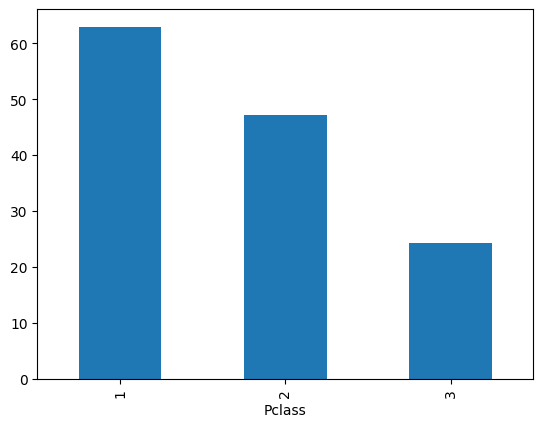

In [52]:
(titanic.groupby('Pclass')['Survived'].mean() * 100).plot(kind='bar')